# Project Goal

The goal of this challenge is to build a model that predicts conversion rate and, based on the model, come up with ideas to improve it.

`country` : user country based on the IP address

`age` : user age. Self-reported at sign-up step

`new_user` : whether the user created the account during this session or had already an account and simply came back to the site

`source` : marketing channel source
`Ads`: came to the site by clicking on an advertisement
`Seo`: came to the site by clicking on search results
`Direct`: came to the site by directly typing the URL on the browser

`total_pages_visited`: number of total pages visited during the session. This can be seen as a proxy for time spent on site and engagement

`converted`: this is our label. 1 means they converted within the session, 0 means they left without buying anything. 


-- The company goal is to increase conversion rate: # conversions / total sessions

In [156]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import pyodbc
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt
import math
import seaborn as sns
import matplotlib.pyplot as plt
import heapq
import time
from datetime import datetime, date, time, timedelta
import math
import timeit
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 3000)
import warnings
from datetime import datetime
warnings.filterwarnings("ignore")
import plotly
import pandas as pd
from plotly.offline import iplot
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from collections import Counter

In [157]:
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [158]:
data = pd.read_csv('conversion_project.csv')

# Class Distribution : 

Converted as a Percentage of Total

In [159]:
(data['converted'].value_counts()[1]/(data['converted'].value_counts()[0]  + data['converted'].value_counts()[1])) * 100

3.225806451612903

### Observation :  Classes are imbalanced, hence we may have to try class imbalance techniques

In [160]:
data

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0
5,US,31,0,Seo,1,0
6,China,27,1,Seo,4,0
7,US,23,0,Ads,4,0
8,UK,29,0,Direct,4,0
9,US,25,0,Ads,2,0


# Exploratory Data Analysis

## 1 - Missing Values

In [161]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

print(missing_values_table(data))


Your selected dataframe has 6 columns.
There are 0 columns that have missing values.
Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []


## 2- Conversion Distribution 

### 2.1 - By Country

In [162]:
def country_conversion_stats(data):
    dc_non_converted = data[data.converted == 0]
    dc_non_converted = dc_non_converted.groupby(['country'])['converted'].count().reset_index()
    dc_non_converted.columns = ['Country','NonConverted']
    dc_non_converted = dc_non_converted.sort_values(by = 'NonConverted', ascending = False)
    dc_converted = data[data.converted == 1]
    dc_converted = dc_converted.groupby(['country'])['converted'].count().reset_index()
    dc_converted.columns = ['Country','Converted']
    dc_converted = dc_converted.sort_values(by = 'Converted', ascending = False)
    conversion_stats_country = pd.merge(dc_non_converted, dc_converted, how = 'inner', left_on = 'Country', right_on = 'Country')
    conversion_stats_country['Total_Population'] = conversion_stats_country['NonConverted'] + conversion_stats_country['Converted']
    conversion_stats_country['Impact_Size'] = conversion_stats_country['Total_Population']/min(conversion_stats_country['Total_Population'])
    conversion_stats_country['Conversion_Percentage'] = conversion_stats_country['Converted']/(conversion_stats_country['Converted'] + conversion_stats_country['NonConverted']) * 100
    
    return conversion_stats_country


In [163]:
conversion_stats_country = country_conversion_stats(data)
conversion_stats_country

,Country,NonConverted,Converted,Total_Population,Impact_Size,Conversion_Percentage
0,US,171360,6732,178092,13.640625,3.780069
1,China,76500,102,76602,5.867188,0.133156
2,UK,45900,2550,48450,3.710938,5.263158
3,Germany,12240,816,13056,1.000000,6.250000


In [164]:
def visualize_cr(data, column1, column2):
    
        
        c1 = list(data[column1])

        y1 = list(data[column2]) 



        trace1 = go.Bar(
            x = c1,
            y = y1,
            name =  "Conversion Rate by Country",
        #     text= Y1,
        #     textposition='bottom right',
        #     mode="lines+text",
            marker=dict(
                color='darkorange', 
                line=dict(
                    color='darkorange',
                    width=1.5),
                        ),
            width = 0.25,
            opacity=1
        )

  

        ##############################################



        layout = go.Layout(
                title= print('Conversion Rate by Country'),
                yaxis=dict(
                title= 'Percentage'
            ),
                xaxis=dict(
                title= 'Country' 
            )
        )



        data = [trace1]
        fig = go.Figure(data=data, layout=layout)


        fig.update_layout(
            autosize=False,
            width=1000,
            height=500,
            margin=go.layout.Margin(
                l=50,
                r=50,
                b=100,
                t=100,
                pad=4
            ),
            paper_bgcolor='rgba(0,0,0,0)',
            plot_bgcolor='rgba(0,0,0,0)'
        )

        fig.update_layout(
            legend=go.layout.Legend(
                x=0.076,
                y=1.13,
                traceorder="normal",
                font=dict(
                    family="sans-serif",
                    size=12,
                    color="black"
                ),
                bgcolor= 'rgba(0,0,0,0)',
                bordercolor="Black",
                borderwidth=2
            ),
           legend_orientation="h"

        )


        fig.update_xaxes(ticks="outside", tickwidth=2, tickcolor='crimson', ticklen=5, tickangle = 90)
        fig.update_yaxes(ticks="outside", tickwidth=2, tickcolor='crimson', ticklen=5)
        fig.update_xaxes(showline=True, linewidth=2, linecolor='black', zeroline=True, showgrid=False)
        fig.update_yaxes(showline=True, linewidth=2, linecolor='black', zeroline=True, showgrid=False)




        iplot(fig, filename="TMT")

In [165]:
visualize_cr(conversion_stats_country, 'Country', 'Conversion_Percentage')

Conversion Rate by Country


### Observation : 

 - US had the highest population which got reached out on differnet mediums of ads, followed by China, UK and lastly Germany
 - Germany on the contrary had the highest conversion percentage as compared to the other countries
 

### 2.2- By Age

In [166]:
def distribute_age(data):
    age_distribution = data[['age','converted']]

    age_distribution_converted = age_distribution[age_distribution['converted'] == 1]['age'].describe().reset_index()
    age_distribution_converted.columns = ['Measure','Converted_Stats']

    age_distribution_nonconverted  = age_distribution[age_distribution['converted'] == 0]['age'].describe().reset_index()
    age_distribution_nonconverted.columns = ['Measure','NonConverted_Stats']

    age_stats = pd.merge(age_distribution_converted,age_distribution_nonconverted, how = 'inner', left_on = 'Measure', right_on = 'Measure' )
    return age_stats


In [167]:
age_stats = distribute_age(data)
age_stats

,Measure,Converted_Stats,NonConverted_Stats
0,count,10200.000000,306000.000000
1,mean,26.546765,30.703961
2,std,7.051849,8.275779
3,min,17.000000,17.000000
4,25%,21.000000,24.000000
5,50%,25.000000,30.000000
6,75%,31.000000,36.000000
7,max,123.000000,79.000000


### Observation : 

 - There seems to some anomaly in the max age of the converted individuals. The max age 123 seems suspicious, a potential solution would be cap this value and impute it with the average age the subset
 - On average the converted subset seems younger as compared to the non converted subset

In [168]:
data.iloc[90928,1] = 26
data.iloc[295581,1] = 30

### 2.2- By Country & Age

In [169]:
def country_age_conversion_stats(data):
    data_list = []
    countries = list(set(data['country']))
    for country in countries:
        data_country = data[data['country'] == country][['country','age','converted']]
        data_country = data_country.sort_values(by = 'age').reset_index()
        data_country = data_country.iloc[:,1:]
        data_country = data_country.groupby(['age','converted']).count().reset_index()
        data_country_nc = data_country[data_country.converted == 0]
        data_country_c = data_country[data_country.converted == 1]
        country_conversion_stats = pd.merge(data_country_nc,data_country_c, how = 'outer', on = 'age').fillna(0)
        country_conversion_stats = country_conversion_stats[['age','country_x','country_y']]
        country_conversion_stats.columns = ['age','not_converted','converted']
        country_conversion_stats['country'] = country
        columns = country_conversion_stats.columns.tolist()
        columns = columns[-1:] + columns[:-1]
        country_conversion_stats = country_conversion_stats[columns]
        country_conversion_stats['conversion_ratio'] = (country_conversion_stats['converted']/(country_conversion_stats['converted'] + country_conversion_stats['not_converted']))*100
        country_conversion_stats['conversion_percentage'] = (country_conversion_stats['converted']/ country_conversion_stats['converted'].sum())*100
        country_conversion_stats['cumulative_ccp'] = country_conversion_stats['conversion_percentage'].cumsum()
        data_list.append(country_conversion_stats)
    
    country_conversion_stats =  pd.concat(data_list, axis = 0)
    
    return country_conversion_stats


In [170]:
country_conversion_stats = country_age_conversion_stats(data)
country_conversion_stats

,country,age,not_converted,converted,conversion_ratio,conversion_percentage,cumulative_ccp
0,US,17,3892,371.0,8.702791,5.510992,5.510992
1,US,18,4411,361.0,7.564962,5.362448,10.873440
2,US,19,4951,351.0,6.620143,5.213904,16.087344
3,US,20,5321,364.0,6.402814,5.407011,21.494355
4,US,21,5787,380.0,6.161829,5.644682,27.139037
5,US,22,6238,432.0,6.476762,6.417112,33.556150
6,US,23,6496,391.0,5.677363,5.808081,39.364231
7,US,24,6922,403.0,5.501706,5.986334,45.350564
8,US,25,7188,339.0,4.503786,5.035651,50.386215
9,US,26,7539,368.0,4.654104,5.466429,55.852644


In [171]:
list(set(country_conversion_stats['country']))

['US', 'China', 'Germany', 'UK']

In [172]:
def visualize_ca(data, column1, column2):
    
        data_ch = data[data['country'] == 'China']
        c1 = list(data_ch[column1])

        y1 = list(data_ch[column2]) 



        trace1 = go.Bar(
            x = c1,
            y = y1,
            name =  "Conversion Rate China",
        #     text= Y1,
        #     textposition='bottom right',
        #     mode="lines+text",
            marker=dict(
                color='purple', 
                line=dict(
                    color='purple',
                    width=1.5),
                        ),
            width = 0.25,
            opacity=1
        )

        data_us = data[data['country'] == 'US']
        c2 = list(data_us[column1])

        y2 = list(data_us[column2]) 


        trace2 = go.Bar(
            x = c2,
            y = y2,
            name =  "Conversion Rate US",
        #     text= Y1,
        #     textposition='bottom right',
        #     mode="lines+text",
            marker=dict(
                color='darkorange', 
                line=dict(
                    color='darkorange',
                    width=1.5),
                        ),
            width = 0.25,
            opacity=1
        )

        
        data_uk = data[data['country'] == 'UK']
        c3 = list(data_uk[column1])

        y3 = list(data_uk[column2]) 
        
        trace3 = go.Bar(
            x = c3,
            y = y3,
            name = 'Conversion Rate UK',
        #     text= Y1,
        #     textposition='bottom right',
        #     mode="lines+text",
            marker=dict(
                color='lightslategrey', 
                line=dict(
                    color='lightslategrey',
                    width=1.5),
                        ),
            width = 0.025,
            opacity=1
        )

        data_gr = data[data['country'] == 'Germany']
        c4 = list(data_gr[column1])

        y4 = list(data_gr[column2]) 
        
        trace4 = go.Bar(
            x = c4,
            y = y4,
            name = 'Conversion Rate Germany',
        #     text= Y1,
        #     textposition='bottom right',
        #     mode="lines+text",
            marker=dict(
                color='Green', 
                line=dict(
                    color='Green',
                    width=1.5),
                        ),
            width = 0.025,
            opacity=1
        )
        
        

        ##############################################



        layout = go.Layout(
                title= print('Conversion Rate by Country and Age'),
                yaxis=dict(
                title= 'Percentage'
            ),
                xaxis=dict(
                title= 'Age' 
            )
        )



        data = [trace1, trace2, trace3, trace4]
        fig = go.Figure(data=data, layout=layout)


        fig.update_layout(
            autosize=False,
            width=1000,
            height=500,
            margin=go.layout.Margin(
                l=50,
                r=50,
                b=100,
                t=100,
                pad=4
            ),
            paper_bgcolor='rgba(0,0,0,0)',
            plot_bgcolor='rgba(0,0,0,0)'
        )

        fig.update_layout(
            legend=go.layout.Legend(
                x=0.076,
                y=1.13,
                traceorder="normal",
                font=dict(
                    family="sans-serif",
                    size=12,
                    color="black"
                ),
                bgcolor= 'rgba(0,0,0,0)',
                bordercolor="Black",
                borderwidth=2
            ),
           legend_orientation="h"

        )


        fig.update_xaxes(ticks="outside", tickwidth=2, tickcolor='crimson', ticklen=5, tickangle = 90)
        fig.update_yaxes(ticks="outside", tickwidth=2, tickcolor='crimson', ticklen=5)
        fig.update_xaxes(showline=True, linewidth=2, linecolor='black', zeroline=True, showgrid=False)
        fig.update_yaxes(showline=True, linewidth=2, linecolor='black', zeroline=True, showgrid=False)




        iplot(fig, filename="TMT")

In [173]:
visualize_ca(country_conversion_stats, 'age', 'cumulative_ccp')

Conversion Rate by Country and Age


### Observation : 

 China vs US: 

 - The conversion rate for people below 20 is higher for US and equal or less for China
 - For people in age range 20-30 the conversion rate is higher is for Chinese then for US
 - The trend continues and people in china are easily converted as compare to US, for age range 30-40 and 40-50

 China vs UK:
 - Here again the conversion rate for chinese people are higher as compared to people in the UK ( age range <20 and 20 - 45)
 
 China vs Germany:
 - Here again the conversion rate for chinese people are higher as compared to people in the UK ( age range <20 and 20 - 45)
 
 US vs UK: 
 - The conversion rate is pretty consistent throughout except for one case in age range 20 - 30
 
 US vs Germany:
 - Before age 20, Germany had a higher conversion rate as compared to US
 - After that point, the conversion rate has been pretty consistent
 
 UK vs Germany:
 - Before 32, UK has had a higher conversion rate than Germany, after that point conversion rate has been pretty smooth
 

### 2.3- By New-Old User

In [174]:
def user_type_conversion_stats(data):

    user_type = data[['new_user','converted']]


    converted = user_type[user_type['converted'] == 1]
    not_converted = user_type[user_type['converted'] == 0]

    converted = converted['new_user'].value_counts().reset_index()
    converted.columns = ['UserType','Converted']
    converted = converted.sort_values(by = 'UserType')
    converted = converted.reset_index()
    converted = converted.iloc[:,1:]


    not_converted = not_converted['new_user'].value_counts().reset_index()
    not_converted.columns = ['UserType','NotConverted']
    not_converted = not_converted.sort_values(by = 'UserType')
    not_converted = not_converted.reset_index()
    not_converted = not_converted.iloc[:,1:]

    user_conversion_stats = pd.merge(converted, not_converted, how = 'inner', left_on = 'UserType', right_on = 'UserType')
    user_conversion_stats['conversion_percentage'] = (user_conversion_stats['Converted']/(user_conversion_stats['Converted'] + user_conversion_stats['NotConverted']))*100
    return user_conversion_stats

In [175]:
user_conversion_stats = user_type_conversion_stats(data)

In [176]:
user_conversion_stats

,UserType,Converted,NotConverted,conversion_percentage
0,0,7161,92295,7.200169
1,1,3039,213705,1.402115


In [177]:
def visualize_user(data, column1, column2):
    
        
        c1 = list(data[column1])

        y1 = list(data[column2]) 



        trace1 = go.Bar(
            x = c1,
            y = y1,
            name =  "Conversion Rate User",
        #     text= Y1,
        #     textposition='bottom right',
        #     mode="lines+text",
            marker=dict(
                color='lightslategrey', 
                line=dict(
                    color='lightslategrey',
                    width=1.5),
                        ),
            width = 0.25,
            opacity=1
        )

        
        

        ##############################################



        layout = go.Layout(
                title= print('Conversion Rate by User'),
                yaxis=dict(
                title= 'Percentage'
            ),
                xaxis=dict(
                title= 'User' 
            )
        )



        data = [trace1]
        fig = go.Figure(data=data, layout=layout)


        fig.update_layout(
            autosize=False,
            width=1000,
            height=500,
            margin=go.layout.Margin(
                l=50,
                r=50,
                b=100,
                t=100,
                pad=4
            ),
            paper_bgcolor='rgba(0,0,0,0)',
            plot_bgcolor='rgba(0,0,0,0)'
        )

        fig.update_layout(
            legend=go.layout.Legend(
                x=0.076,
                y=1.13,
                traceorder="normal",
                font=dict(
                    family="sans-serif",
                    size=12,
                    color="black"
                ),
                bgcolor= 'rgba(0,0,0,0)',
                bordercolor="Black",
                borderwidth=2
            ),
           legend_orientation="h"

        )


        fig.update_xaxes(ticks="outside", tickwidth=2, tickcolor='crimson', ticklen=5, tickangle = 90)
        fig.update_yaxes(ticks="outside", tickwidth=2, tickcolor='crimson', ticklen=5)
        fig.update_xaxes(showline=True, linewidth=2, linecolor='black', zeroline=True, showgrid=False)
        fig.update_yaxes(showline=True, linewidth=2, linecolor='black', zeroline=True, showgrid=False)




        iplot(fig, filename="TMT")

In [178]:
visualize_user(user_conversion_stats, 'UserType', 'conversion_percentage')

Conversion Rate by User


### Observation

Of all the new users which were reached out, ~1.4% got converted, and for the old users we saw a conversion rate of 7.22%

### 2.4- Country User

In [179]:
def country_user_distribution(data):
    data_list = []
    countries = list(set(data['country']))
    for country in countries:
        country_user = data[data.country == country]
        country_user = country_user[['country','new_user','converted']]
        country_user_c = country_user[country_user['converted'] == 1]
        country_user_nc = country_user[country_user['converted'] == 0]
        country_user_c = country_user_c.groupby('new_user')['converted'].count().reset_index()
        country_user_c.columns  = ['User_Type','Converted']
        country_user_nc = country_user_nc.groupby('new_user')['converted'].count().reset_index()
        country_user_nc.columns  = ['User_Type','NotConverted']
        country_user_stats = pd.merge(country_user_c, country_user_nc, how = 'inner', left_on = 'User_Type', right_on = 'User_Type')
        country_user_stats['country'] = country
        columns = country_user_stats.columns.tolist()
        columns = columns[-1:] + columns[:-1]
        country_user_stats = country_user_stats[columns]
        data_list.append(country_user_stats)
    
    country_user_stats = pd.concat(data_list, axis = 0)
    country_user_stats['Percentage_Converted'] = (country_user_stats['Converted']/(country_user_stats['Converted'] + country_user_stats['NotConverted'])) * 100

    return country_user_stats

In [180]:
country_user_stats = country_user_distribution(data)

In [181]:
country_user_stats

,country,User_Type,Converted,NotConverted,Percentage_Converted
0,US,0,4732,51904,8.355110
1,US,1,2000,119456,1.646687
0,China,0,66,23028,0.285789
1,China,1,36,53472,0.067280
0,Germany,0,589,3625,13.977219
1,Germany,1,227,8615,2.567292
0,UK,0,1774,13738,11.436307
1,UK,1,776,32162,2.355941


In [182]:
def visualize_cuser(data, column1, column2):
    
        data_ch = data[data['country'] == 'China']
        c1 = list(data_ch[column1])

        y1 = list(data_ch[column2]) 



        trace1 = go.Bar(
            x = c1,
            y = y1,
            name =  "Conversion Rate China",
        #     text= Y1,
        #     textposition='bottom right',
        #     mode="lines+text",
            marker=dict(
                color='purple', 
                line=dict(
                    color='purple',
                    width=0.25),
                        ),
            width = 0.25,
            opacity=1
        )

        data_us = data[data['country'] == 'US']
        c2 = list(data_us[column1])

        y2 = list(data_us[column2]) 


        trace2 = go.Bar(
            x = c2,
            y = y2,
            name =  "Conversion Rate US",
        #     text= Y1,
        #     textposition='bottom right',
        #     mode="lines+text",
            marker=dict(
                color='darkorange', 
                line=dict(
                    color='darkorange',
                    width=0.25),
                        ),
            width = 0.25,
            opacity=1
        )

        
        data_uk = data[data['country'] == 'UK']
        c3 = list(data_uk[column1])

        y3 = list(data_uk[column2]) 
        
        trace3 = go.Bar(
            x = c3,
            y = y3,
            name = 'Conversion Rate UK',
        #     text= Y1,
        #     textposition='bottom right',
        #     mode="lines+text",
            marker=dict(
                color='lightslategrey', 
                line=dict(
                    color='lightslategrey',
                    width=0.25),
                        ),
            width = 0.025,
            opacity=1
        )

        data_gr = data[data['country'] == 'Germany']
        c4 = list(data_gr[column1])

        y4 = list(data_gr[column2]) 
        
        trace4 = go.Bar(
            x = c4,
            y = y4,
            name = 'Conversion Rate Germany',
        #     text= Y1,
        #     textposition='bottom right',
        #     mode="lines+text",
            marker=dict(
                color='Green', 
                line=dict(
                    color='Green',
                    width=0.25),
                        ),
            width = 0.025,
            opacity=1
        )
        
        

        ##############################################



        layout = go.Layout(
                title= print('Conversion Rate by Country and Age'),
                yaxis=dict(
                title= 'Percentage'
            ),
                xaxis=dict(
                title= 'Age' 
            )
        )



        data = [trace1, trace2, trace3, trace4]
        fig = go.Figure(data=data, layout=layout)


        fig.update_layout(
            autosize=False,
            width=1000,
            height=500,
            margin=go.layout.Margin(
                l=50,
                r=50,
                b=100,
                t=100,
                pad=4
            ),
            paper_bgcolor='rgba(0,0,0,0)',
            plot_bgcolor='rgba(0,0,0,0)'
        )

        fig.update_layout(
            legend=go.layout.Legend(
                x=0.076,
                y=1.13,
                traceorder="normal",
                font=dict(
                    family="sans-serif",
                    size=12,
                    color="black"
                ),
                bgcolor= 'rgba(0,0,0,0)',
                bordercolor="Black",
                borderwidth=2
            ),
           legend_orientation="h"

        )


        fig.update_xaxes(ticks="outside", tickwidth=2, tickcolor='crimson', ticklen=5, tickangle = 90)
        fig.update_yaxes(ticks="outside", tickwidth=2, tickcolor='crimson', ticklen=5)
        fig.update_xaxes(showline=True, linewidth=2, linecolor='black', zeroline=True, showgrid=False)
        fig.update_yaxes(showline=True, linewidth=2, linecolor='black', zeroline=True, showgrid=False)




        iplot(fig, filename="TMT")

In [183]:
visualize_cuser(country_user_stats, 'User_Type', 'Percentage_Converted')

Conversion Rate by Country and Age


### Observation : 

 - In germany the conversion rate for Old users is highest followed by UK , USA and lastly by China
 - The same trend is followed for new users

### 2.5- Country-User-Source

In [184]:
def country_user_source_stats(data):
    cus = data[['country','new_user','source','converted']]
    cus_noc = cus[cus.converted == 0]
    cus_noc = cus_noc.groupby(['country','new_user','source'])['converted'].count().reset_index()
    cus_noc.columns = ['country','new_user','source','not_converted']
    
    cus_c = cus[cus.converted == 1]
    cus_c = cus_c.groupby(['country','new_user','source'])['converted'].count().reset_index()
    cus_c.columns = ['country','new_user','source','converted']
    cus_c['not_converted'] = cus_noc['not_converted']
    cus_c['Percentage_Converted'] = (cus_c['converted']/(cus_c['converted'] + cus_c['not_converted'])) * 100
    return cus_c

In [185]:
cus_stats = country_user_source_stats(data)

In [186]:
cus_stats

,country,new_user,source,converted,not_converted,Percentage_Converted
0,China,0,Ads,22,6519,0.336340
1,China,0,Direct,14,5248,0.266059
2,China,0,Seo,30,11261,0.265698
3,China,1,Ads,10,15010,0.066578
4,China,1,Direct,10,12191,0.081960
5,China,1,Seo,16,26271,0.060867
6,Germany,0,Ads,189,1035,15.441176
7,Germany,0,Direct,105,797,11.640798
8,Germany,0,Seo,295,1793,14.128352
9,Germany,1,Ads,62,2474,2.444795


In [187]:
def visualize_cuser_ads(data, column1, column2):
    
        # China 
        
        # Ads
        data_ch = data[data['country'] == 'China']
        data_us = data[data['country'] == 'US']
        data_uk = data[data['country'] == 'UK']
        data_gr = data[data['country'] == 'Germany']
        
        
        data_ch_ads = data_ch[data_ch['source'] == 'Ads']
        c1a = list(data_ch_ads[column1])

        y1a = list(data_ch_ads[column2]) 



        trace1 = go.Bar(
            x = c1a,
            y = y1a,
            name =  "Conversion Rate China Ads",
        #     text= Y1,
        #     textposition='bottom right',
        #     mode="lines+text",
            marker=dict(
                color='purple', 
                line=dict(
                    color='purple',
                    width=0.25),
                        ),
            width = 0.25,
            opacity=1
        )
        
       
        
        # US
        
        # Ads
        
        data_us_ads = data_us[data_us['source'] == 'Ads']
        c1a = list(data_us_ads[column1])

        y1a = list(data_us_ads[column2]) 



        trace4 = go.Bar(
            x = c1a,
            y = y1a,
            name =  "Conversion Rate US Ads",
        #     text= Y1,
        #     textposition='bottom right',
        #     mode="lines+text",
            marker=dict(
                color='blueviolet', 
                line=dict(
                    color='blueviolet',
                    width=0.25),
                        ),
            width = 0.25,
            opacity=1
        )
        
        
        
        
        # UK
        
        # Ads
       
        data_uk_ads = data_uk[data_uk['source'] == 'Ads']
        c1a = list(data_uk_ads[column1])

        y1a = list(data_uk_ads[column2]) 



        trace7 = go.Bar(
            x = c1a,
            y = y1a,
            name =  "Conversion Rate UK Ads",
        #     text= Y1,
        #     textposition='bottom right',
        #     mode="lines+text",
            marker=dict(
                color='darkseagreen', 
                line=dict(
                    color='darkseagreen',
                    width=0.25),
                        ),
            width = 0.25,
            opacity=1
        )
        
        
        
        
        
        # Germany
        
                
        # Ads
       
        
        data_gr_ads = data_gr[data_gr['source'] == 'Ads']
        c1a = list(data_gr_ads[column1])

        y1a = list(data_gr_ads[column2]) 



        trace10 = go.Bar(
            x = c1a,
            y = y1a,
            name =  "Conversion Rate Germany Ads",
        #     text= Y1,
        #     textposition='bottom right',
        #     mode="lines+text",
            marker=dict(
                color='forestgreen', 
                line=dict(
                    color='forestgreen',
                    width=0.25),
                        ),
            width = 0.25,
            opacity=1
        )
        
        

        ##############################################



        layout = go.Layout(
                title= print('Conversion Rate by Country and Age'),
                yaxis=dict(
                title= 'Percentage'
            ),
                xaxis=dict(
                title= 'User' 
            )
        )



        data = [trace1, trace4, trace7, trace10 ]
        fig = go.Figure(data=data, layout=layout)


        fig.update_layout(
            autosize=False,
            width=1000,
            height=500,
            margin=go.layout.Margin(
                l=50,
                r=50,
                b=100,
                t=100,
                pad=4
            ),
            paper_bgcolor='rgba(0,0,0,0)',
            plot_bgcolor='rgba(0,0,0,0)'
        )

        fig.update_layout(
            legend=go.layout.Legend(
                x=0.076,
                y=1.13,
                traceorder="normal",
                font=dict(
                    family="sans-serif",
                    size=12,
                    color="black"
                ),
                bgcolor= 'rgba(0,0,0,0)',
                bordercolor="Black",
                borderwidth=2
            ),
           legend_orientation="h"

        )


        fig.update_xaxes(ticks="outside", tickwidth=2, tickcolor='crimson', ticklen=5, tickangle = 90)
        fig.update_yaxes(ticks="outside", tickwidth=2, tickcolor='crimson', ticklen=5)
        fig.update_xaxes(showline=True, linewidth=2, linecolor='black', zeroline=True, showgrid=False)
        fig.update_yaxes(showline=True, linewidth=2, linecolor='black', zeroline=True, showgrid=False)




        iplot(fig, filename="TMT")

In [188]:
visualize_cuser_ads(cus_stats, 'new_user', 'Percentage_Converted')

Conversion Rate by Country and Age


In [189]:
def visualize_cuser_direct(data, column1, column2):
    
        # China 
        
        data_ch = data[data['country'] == 'China']
        data_us = data[data['country'] == 'US']
        data_uk = data[data['country'] == 'UK']
        data_gr = data[data['country'] == 'Germany']
        
        data_ch_direct = data_ch[data_ch['source'] == 'Direct']
        c1d = list(data_ch_direct[column1])

        y1d = list(data_ch_direct[column2])
      


        trace2 = go.Bar(
            x = c1d,
            y = y1d,
            name =  "Conversion Rate China Direct",
        #     text= Y1,
        #     textposition='bottom right',
        #     mode="lines+text",
            marker=dict(
                color='darkorange', 
                line=dict(
                    color='darkorange',
                    width=0.25),
                        ),
            width = 0.25,
            opacity=1
        )

       
        
        # US
        
        
        data_us_direct = data_us[data_us['source'] == 'Direct']
        c1d = list(data_us_direct[column1])

        y1d = list(data_us_direct[column2])
      


        trace5 = go.Bar(
            x = c1d,
            y = y1d,
            name =  "Conversion Rate US Direct",
        #     text= Y1,
        #     textposition='bottom right',
        #     mode="lines+text",
            marker=dict(
                color='darkorchid', 
                line=dict(
                    color='darkorchid',
                    width=0.25),
                        ),
            width = 0.25,
            opacity=1
        )   
        
        # UK
        
        # Direct
        
        data_uk_direct = data_uk[data_uk['source'] == 'Direct']
        c1d = list(data_uk_direct[column1])

        y1d = list(data_uk_direct[column2])
      


        trace8 = go.Bar(
            x = c1d,
            y = y1d,
            name =  "Conversion Rate UK Direct",
        #     text= Y1,
        #     textposition='bottom right',
        #     mode="lines+text",
            marker=dict(
                color='darkslategrey', 
                line=dict(
                    color='darkslategrey',
                    width=0.25),
                        ),
            width = 0.25,
            opacity=1
        )

        
        
        
        # Germany
        
                
        data_gr_direct = data_gr[data_gr['source'] == 'Direct']
        c1d = list(data_gr_direct[column1])

        y1d = list(data_gr_direct[column2])
      


        trace11 = go.Bar(
            x = c1d,
            y = y1d,
            name =  "Conversion Rate Germany Direct",
        #     text= Y1,
        #     textposition='bottom right',
        #     mode="lines+text",
            marker=dict(
                color='indianred', 
                line=dict(
                    color='indianred',
                    width=0.25),
                        ),
            width = 0.25,
            opacity=1
        )
        
        

        ##############################################



        layout = go.Layout(
                title= print('Conversion Rate by Country and Age'),
                yaxis=dict(
                title= 'Percentage'
            ),
                xaxis=dict(
                title= 'User' 
            )
        )



        data = [trace2, trace5, trace8, trace11 ]
        fig = go.Figure(data=data, layout=layout)


        fig.update_layout(
            autosize=False,
            width=1000,
            height=500,
            margin=go.layout.Margin(
                l=50,
                r=50,
                b=100,
                t=100,
                pad=4
            ),
            paper_bgcolor='rgba(0,0,0,0)',
            plot_bgcolor='rgba(0,0,0,0)'
        )

        fig.update_layout(
            legend=go.layout.Legend(
                x=0.076,
                y=1.13,
                traceorder="normal",
                font=dict(
                    family="sans-serif",
                    size=12,
                    color="black"
                ),
                bgcolor= 'rgba(0,0,0,0)',
                bordercolor="Black",
                borderwidth=2
            ),
           legend_orientation="h"

        )


        fig.update_xaxes(ticks="outside", tickwidth=2, tickcolor='crimson', ticklen=5, tickangle = 90)
        fig.update_yaxes(ticks="outside", tickwidth=2, tickcolor='crimson', ticklen=5)
        fig.update_xaxes(showline=True, linewidth=2, linecolor='black', zeroline=True, showgrid=False)
        fig.update_yaxes(showline=True, linewidth=2, linecolor='black', zeroline=True, showgrid=False)




        iplot(fig, filename="TMT")

In [190]:
visualize_cuser_direct(cus_stats, 'new_user', 'Percentage_Converted')

Conversion Rate by Country and Age


In [191]:
def visualize_cuser_seo(data, column1, column2):
        
        # SEO
        
        data_ch = data[data['country'] == 'China']
        data_us = data[data['country'] == 'US']
        data_uk = data[data['country'] == 'UK']
        data_gr = data[data['country'] == 'Germany']
        
        data_ch_seo = data_ch[data_ch['source'] == 'Seo']
        c1s = list(data_ch_seo[column1])

        y1s = list(data_ch_seo[column2])
        
        trace3 = go.Bar(
            x = c1s,
            y = y1s,
            name = 'Conversion Rate China Seo',
        #     text= Y1,
        #     textposition='bottom right',
        #     mode="lines+text",
            marker=dict(
                color='lightslategrey', 
                line=dict(
                    color='lightslategrey',
                    width=0.25),
                        ),
            width = 0.025,
            opacity=1
        )

        
        # Direct
        

        # SEO
        
        data_us_seo = data_us[data_us['source'] == 'Seo']
        c1s = list(data_us_seo[column1])

        y1s = list(data_us_seo[column2])
        
        trace6 = go.Bar(
            x = c1s,
            y = y1s,
            name = 'Conversion Rate US Seo',
        #     text= Y1,
        #     textposition='bottom right',
        #     mode="lines+text",
            marker=dict(
                color='darkred', 
                line=dict(
                    color='darkred',
                    width=0.25),
                        ),
            width = 0.025,
            opacity=1
        )
        
        
        
        
        # SEO
        
        data_uk_seo = data_uk[data_uk['source'] == 'Seo']
        c1s = list(data_uk_seo[column1])

        y1s = list(data_uk_seo[column2])
        
        trace9 = go.Bar(
            x = c1s,
            y = y1s,
            name = 'Conversion Rate UK Seo',
        #     text= Y1,
        #     textposition='bottom right',
        #     mode="lines+text",
            marker=dict(
                color='deeppink', 
                line=dict(
                    color='deeppink',
                    width=0.25),
                        ),
            width = 0.025,
            opacity=1
        )
        
        
        
        # Direct
        
        

        # SEO
        
        data_gr_seo = data_gr[data_gr['source'] == 'Seo']
        c1s = list(data_gr_seo[column1])

        y1s = list(data_gr_seo[column2])
        
        trace12 = go.Bar(
            x = c1s,
            y = y1s,
            name = 'Conversion Rate Germany Seo',
        #     text= Y1,
        #     textposition='bottom right',
        #     mode="lines+text",
            marker=dict(
                color='tomato', 
                line=dict(
                    color='tomato',
                    width=0.25),
                        ),
            width = 0.025,
            opacity=1
        )
        
        layout = go.Layout(
                title= print('Conversion Rate by Country and Age'),
                yaxis=dict(
                title= 'Percentage'
            ),
                xaxis=dict(
                title= 'User' 
            )
        )



        data = [trace3, trace6, trace9, trace12 ]
        fig = go.Figure(data=data, layout=layout)


        fig.update_layout(
            autosize=False,
            width=1000,
            height=500,
            margin=go.layout.Margin(
                l=50,
                r=50,
                b=100,
                t=100,
                pad=4
            ),
            paper_bgcolor='rgba(0,0,0,0)',
            plot_bgcolor='rgba(0,0,0,0)'
        )

        fig.update_layout(
            legend=go.layout.Legend(
                x=0.076,
                y=1.13,
                traceorder="normal",
                font=dict(
                    family="sans-serif",
                    size=12,
                    color="black"
                ),
                bgcolor= 'rgba(0,0,0,0)',
                bordercolor="Black",
                borderwidth=2
            ),
           legend_orientation="h"

        )


        fig.update_xaxes(ticks="outside", tickwidth=2, tickcolor='crimson', ticklen=5, tickangle = 90)
        fig.update_yaxes(ticks="outside", tickwidth=2, tickcolor='crimson', ticklen=5)
        fig.update_xaxes(showline=True, linewidth=2, linecolor='black', zeroline=True, showgrid=False)
        fig.update_yaxes(showline=True, linewidth=2, linecolor='black', zeroline=True, showgrid=False)




        iplot(fig, filename="TMT")
        

In [192]:
visualize_cuser_seo(cus_stats, 'new_user', 'Percentage_Converted')

Conversion Rate by Country and Age


### Observation : 

SEO : 
 - The conversion rate has always been highest for Germany followed by UK, US and lastly China for old and highest for Germany and UK , second highest for US and lowest for China for new users

Direct : 
 - The conversion rate has always been highest for Germany followed by UK, US and lastly China for old and highest for Germany and UK , second highest for US and lowest for China for new users
 
ADS :

 - The conversion rate has always been highest for Germany followed by UK, US and lastly China for old and new users

### 2.6- Pages

total_pages_visited: number of total pages visited during the session. This can be seen as a proxy for time spent on site and engagement

In [193]:
def country_website_engagement_stats(data):
    
    data_c = data[data.converted == 1]
    data_c = data_c.groupby(['country','source'])['total_pages_visited'].describe().reset_index()
    data_nc = data[data.converted == 0]
    data_nc = data_nc.groupby(['country','source'])['total_pages_visited'].describe().reset_index()        

In [194]:
data_nc = data[data.converted == 0]
data_nc = data_nc.groupby(['country','source'])['total_pages_visited'].describe().reset_index()        

In [195]:
data_nc

,country,source,count,mean,std,min,25%,50%,75%,max
0,China,Ads,21529.0,4.549863,2.786440,1.0,2.0,4.0,6.0,18.0
1,China,Direct,17439.0,4.512357,2.768644,1.0,2.0,4.0,6.0,18.0
2,China,Seo,37532.0,4.548119,2.783369,1.0,2.0,4.0,6.0,20.0
3,Germany,Ads,3509.0,4.546309,2.762436,1.0,2.0,4.0,6.0,16.0
4,Germany,Direct,2711.0,4.578384,2.803075,1.0,2.0,4.0,6.0,17.0
5,Germany,Seo,6020.0,4.570432,2.780296,1.0,2.0,4.0,6.0,18.0
6,UK,Ads,12766.0,4.570108,2.815251,1.0,2.0,4.0,6.0,18.0
7,UK,Direct,10616.0,4.535041,2.781931,1.0,2.0,4.0,6.0,19.0
8,UK,Seo,22518.0,4.559996,2.790047,1.0,2.0,4.0,6.0,18.0
9,US,Ads,47876.0,4.547915,2.787346,1.0,2.0,4.0,6.0,18.0


In [196]:
data_c = data[data.converted == 1]
data_cas = data_c.groupby(['country','age','source'])['total_pages_visited'].describe().reset_index()
data_cas

,country,age,source,count,mean,std,min,25%,50%,75%,max
0,China,17,Ads,1.0,13.000000,NaN,13.0,13.00,13.0,13.00,13.0
1,China,17,Direct,2.0,14.500000,2.121320,13.0,13.75,14.5,15.25,16.0
2,China,17,Seo,1.0,17.000000,NaN,17.0,17.00,17.0,17.00,17.0
3,China,18,Ads,2.0,12.000000,1.414214,11.0,11.50,12.0,12.50,13.0
4,China,18,Direct,2.0,12.500000,2.121320,11.0,11.75,12.5,13.25,14.0
5,China,18,Seo,3.0,15.000000,1.732051,14.0,14.00,14.0,15.50,17.0
6,China,19,Ads,1.0,14.000000,NaN,14.0,14.00,14.0,14.00,14.0
7,China,19,Seo,2.0,15.500000,4.949747,12.0,13.75,15.5,17.25,19.0
8,China,20,Ads,2.0,18.500000,0.707107,18.0,18.25,18.5,18.75,19.0
9,China,20,Direct,2.0,14.500000,0.707107,14.0,14.25,14.5,14.75,15.0


In [197]:
def country_source_page_stats(data):
    data_c = data[data.converted == 1]
    data_cas = data_c.groupby(['country','age','source'])['total_pages_visited'].describe().reset_index()
    
    countries = list(set(data_cas['country']))
    sources = list(set(data_cas['source']))
    
    below_20, between_20_30, above_30 = [],[],[]
    country, source = [],[]
    
    for c in countries:
        data_country = data_cas[data_cas.country == c] 
        for s in sources:
            country.append(c)
            source.append(s)
            data_source = data_country[data_country.source == s]
            below_20.append(data_source[data_source.age < 20]['mean'].mean())
            between_20_30.append(data_source[(data_source.age >= 20) & (data_source.age < 30)]['mean'].mean())
            above_30.append(data_source[(data_source.age >= 30)]['mean'].mean())
    result = pd.DataFrame(list(zip(country, source, below_20,between_20_30, above_30 )))
    result.columns = ['country','source','b_20','b_20_30','a_30']
    return result

In [198]:
result = country_source_page_stats(data)
result

,country,source,b_20,b_20_30,a_30
0,Germany,Ads,13.612086,15.238985,13.834160
1,Germany,Direct,15.190476,15.086905,14.074359
2,Germany,Seo,13.850653,14.689013,13.854212
3,US,Ads,14.717185,14.692340,14.952022
4,US,Direct,14.584718,14.482337,14.746370
5,US,Seo,14.464470,14.521312,14.081303
6,China,Ads,13.000000,13.518519,15.466667
7,China,Direct,13.500000,14.777778,16.750000
8,China,Seo,15.833333,13.797917,14.041667
9,UK,Ads,14.685017,14.412131,14.215409


# Predictions

In [199]:
data

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0
5,US,31,0,Seo,1,0
6,China,27,1,Seo,4,0
7,US,23,0,Ads,4,0
8,UK,29,0,Direct,4,0
9,US,25,0,Ads,2,0


In [200]:
response_variabel_distribution = 100 * (data.iloc[:,-1].value_counts()[1]/(data.iloc[:,-1].value_counts()[1] + data.iloc[:,-1].value_counts()[0]))

In [201]:
response_variabel_distribution

3.225806451612903

### Observation : 

This is an Imbalanced Class Problem

In [202]:
# Convert the categorical variables in the dataset and use the below code to plot the class distribution,
# replace the Time and Amount feature with the converted class

In [203]:
data['converted'].value_counts()

0    306000
1     10200
Name: converted, dtype: int64

In [204]:
(10200/(10200 + 306000))*100

3.225806451612903

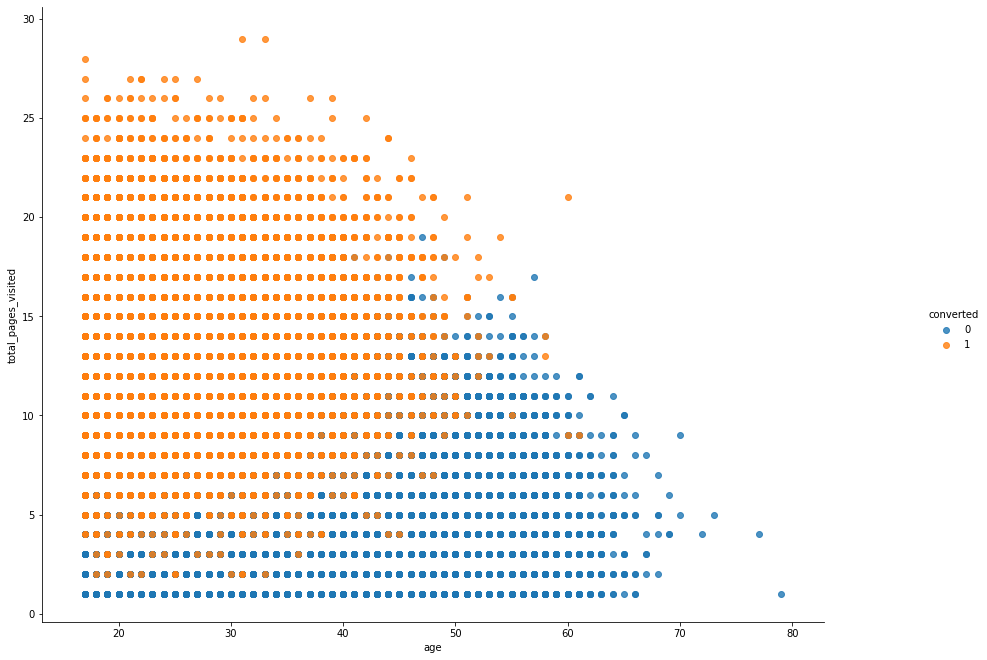

In [205]:
import seaborn as sns
sns.lmplot('age', 'total_pages_visited', data, markers="o",hue='converted', fit_reg=False)
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.show()

Since We'll be interested to know the proability of conversion for each customer, the evaluation metric we would be using to measure the skill of the models used would be Brier Score

In [206]:
data = pd.concat([data.loc[:,data.dtypes != 'object'], 
                   pd.get_dummies(data.loc[:,(data.dtypes == 'object') & (data.columns != 'converted')]).astype(int),
                   data['converted']],  axis = 1)

In [229]:
data_dummy = data.copy(deep = False)
response_variable = data_dummy['converted']
response_variable = list(response_variable.iloc[:,0])
data_dummy =  data_dummy.drop(labels = ['converted'], axis = 1)
data_dummy['converted'] = response_variable

In [230]:
#scaler = StandardScaler()
X,y = data.iloc[:,:-1].values, data.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.33)

In [231]:
X_train

array([[37,  1,  3, ...,  0,  0,  1],
       [38,  1,  4, ...,  0,  0,  1],
       [30,  1,  2, ...,  0,  0,  1],
       ...,
       [37,  1,  4, ...,  0,  0,  1],
       [37,  0,  4, ...,  0,  0,  1],
       [24,  0,  8, ...,  1,  0,  0]])

In [232]:
# scaler= StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [235]:
#X_train

### Logistic Regression

In [236]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve 
from sklearn.metrics import auc

In [237]:
model = LogisticRegression(solver='lbfgs')

In [238]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [239]:
y_hat = model.predict_proba(X_test)
y_test_label = model.predict(X_test)
print(Counter(y_test_label))

Counter({0: 100990, 1: 3356})


In [240]:
positive_probs = y_hat[:,1]
positive_probs

array([4.47534067e-06, 5.11739618e-06, 4.86932729e-05, ...,
       5.57184866e-06, 5.60597996e-06, 1.16164695e-04])

In [241]:
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(y_test, positive_probs) 
auc_score = auc(recall, precision)

In [242]:
print('Logistic PR AUC: %.3f' % auc_score)

Logistic PR AUC: 1.000


In [243]:
def plot_pr_curve(y_test, model_probs):
    # calculate the no skill line as the proportion of the positive class 
    no_skill = len(y_test[y_test==1]) / len(y_test)
    # plot the no skill precision-recall curve
    plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill') # plot model precision-recall curve
    precision, recall, _ = precision_recall_curve(y_test, model_probs)

   
    plt.plot(recall, precision, marker='.', label='Logistic') # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
      # show the legend
    plt.legend()
      # show the plot
    plt.show()


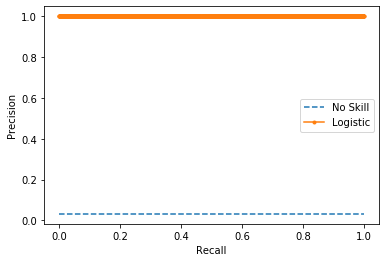

In [244]:
plot_pr_curve(y_test, positive_probs)

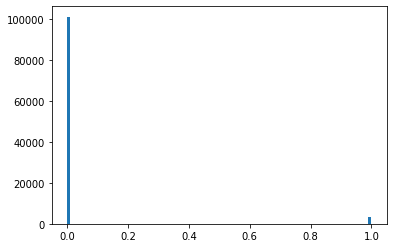

In [245]:
plt.hist(positive_probs, bins = 100)
plt.show()

### Observation : 

For the positive class, that is the minority class most probability values predicted are close to 0, while only a few of them are close to 1. We need carefully choose the model threshold to refine our results

### NOTE

Probability Numbers for Minority Class

In [246]:
class_1 = pd.DataFrame(list(zip(y_test[y_test == 1], y_hat[:,1])))
class_1.columns = ['Converted','Probability']
class_1

,Converted,Probability
0,1,0.000004
1,1,0.000005
2,1,0.000049
3,1,0.000003
4,1,0.000022
5,1,0.000041
6,1,0.000006
7,1,0.000024
8,1,0.000014
9,1,0.000028


### NOTE

Probability Numbers for Majority Class

In [247]:
class_2 = pd.DataFrame(list(zip(y_test[y_test == 0], y_hat[:,0])))
class_2.columns = ['Converted','Probability']
class_2

,Converted,Probability
0,0,0.999996
1,0,0.999995
2,0,0.999951
3,0,0.999997
4,0,0.999978
5,0,0.999959
6,0,0.999994
7,0,0.999976
8,0,0.999986
9,0,0.999972


### XGBoost Classifier

We are varying the following Hyperparameters : 
- learning_rate
- n_estimators
- weights
- subsample
- colsample_bytree
- colsample_bylevel

In [263]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from timer import Timer

In [267]:
# max_features='auto'
# max_depth
# n_estimators = range(50,400,50)
# param_grid = dict(n_estimators = n_estimators)
# kFold = StratifiedKFold(n_splits = 10, shuffle = True,random_state = 7)

In [258]:
model = XGBClassifier()

In [270]:
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
n_estimators = [100,200,300]
weights = [1, 10, 25, 50, 75, 99, 100, 1000]
subsample = [0.1, 0.4, 0.5,0.8,1.0]
colsample_bytree = [0.1,  0.4, 0.5, 0.8, 1.0]
colsample_bylevel = [0.1,  0.4, 0.5, 0.8, 1.0]
param_grid = dict(n_estimators = n_estimators, scale_pos_weight=weights, learning_rate = learning_rate, subsample = subsample, colsample_bytree = colsample_bytree, colsample_bylevel= colsample_bylevel )



In [ ]:
%%time

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) # define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
# execute the grid search
grid_result = grid.fit(X_train, y_train)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_)) # report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
